### **Libraries**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

First, we should call data sets from splitting section.

In [3]:
%store -r X_train
X_train = X_train

%store -r y_train
y_train = y_train

%store -r X_val
X_val = X_val

%store -r y_val
y_val = y_val

In the next sections, based on each model, we define specific pipleline and build and train model.

In [4]:
def evaluate_model(X_train, y_train, X_val, y_val, model):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    cross_val_r2 = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
    cross_val_rmse = -cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

    print(f"Training CV R²: {cross_val_r2.mean():.4f}, Training CV RMSE: {cross_val_rmse.mean():.4f}")

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    r2_train = r2_score(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_val = r2_score(y_val, y_val_pred)
    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

    print(f"Training R²: {r2_train:.4f}, Training RMSE: {rmse_train:.4f}")
    print(f"Validation R²: {r2_val:.4f}, Validation RMSE: {rmse_val:.4f}")

#### **Support Vector Machine**

In [7]:
SVM_model = SVR()
evaluate_model(X_train, y_train, X_val, y_val, SVM_model)

Training CV R²: 0.5849, Training CV RMSE: 0.6441
Training R²: 0.6171, Training RMSE: 0.6187
Validation R²: 0.5971, Validation RMSE: 0.6351


This model is underfit, since both training and validation metric is less.
<hr>

#### **Decision Tree**

In [8]:
DT_model = DecisionTreeRegressor()
evaluate_model(X_train, y_train, X_val, y_val, DT_model)

Training CV R²: 0.1779, Training CV RMSE: 0.8970
Training R²: 0.9749, Training RMSE: 0.1585
Validation R²: 0.2287, Validation RMSE: 0.8787


This model is underfit, since both training and validation metric is less.
<hr>

#### **Random Forest**

In [9]:
RF_model = RandomForestRegressor()
evaluate_model(X_train, y_train, X_val, y_val, RF_model)

Training CV R²: 0.5772, Training CV RMSE: 0.6490
Training R²: 0.9214, Training RMSE: 0.2804
Validation R²: 0.5899, Validation RMSE: 0.6408


This model is underfit, since both training and validation metric is less.
<hr>

#### **Ada Boost**

In [10]:
AB_model = AdaBoostRegressor()
evaluate_model(X_train, y_train, X_val, y_val, AB_model)

Training CV R²: 0.3593, Training CV RMSE: 0.8210
Training R²: 0.3578, Training RMSE: 0.8013
Validation R²: 0.3441, Validation RMSE: 0.8103


This model is underfit, since both training and validation metric is less.
<hr>

#### **XGB Boost**

In [12]:
XGB_model = XGBRegressor()
evaluate_model(X_train, y_train, X_val, y_val, XGB_model)

Training CV R²: 0.5849, Training CV RMSE: 0.6441
Training R²: 0.7494, Training RMSE: 0.5006
Validation R²: 0.6027, Validation RMSE: 0.6307


This model is underfit, since both training and validation metric is less.
<hr>

#### **Cat Boost**

In [13]:
CB_model = CatBoostRegressor()
evaluate_model(X_train, y_train, X_val, y_val, CB_model)

Learning rate set to 0.064243
0:	learn: 0.9642158	total: 136ms	remaining: 2m 16s
1:	learn: 0.9339441	total: 138ms	remaining: 1m 9s
2:	learn: 0.9068959	total: 140ms	remaining: 46.7s
3:	learn: 0.8820252	total: 142ms	remaining: 35.5s
4:	learn: 0.8590574	total: 144ms	remaining: 28.8s
5:	learn: 0.8382045	total: 147ms	remaining: 24.3s
6:	learn: 0.8202477	total: 148ms	remaining: 21.1s
7:	learn: 0.8032645	total: 150ms	remaining: 18.7s
8:	learn: 0.7885091	total: 153ms	remaining: 16.9s
9:	learn: 0.7747321	total: 155ms	remaining: 15.4s
10:	learn: 0.7622974	total: 157ms	remaining: 14.2s
11:	learn: 0.7511392	total: 159ms	remaining: 13.1s
12:	learn: 0.7419531	total: 161ms	remaining: 12.3s
13:	learn: 0.7332064	total: 163ms	remaining: 11.5s
14:	learn: 0.7247772	total: 165ms	remaining: 10.9s
15:	learn: 0.7173621	total: 169ms	remaining: 10.4s
16:	learn: 0.7107234	total: 171ms	remaining: 9.89s
17:	learn: 0.7048032	total: 173ms	remaining: 9.44s
18:	learn: 0.6997492	total: 175ms	remaining: 9.04s
19:	learn:

Among all models, this model is the best, so far.

### **Hyper Parameter Tunning Model**

Since CatBoost has the same result, in this we select and tune it.

In [14]:
# Define the hyperparameter grid
param_grid = {
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [500, 1000]
}

# Perform Grid Search
grid_search = GridSearchCV(CB_model,
                           param_grid,
                           cv = 5,
                           scoring = 'neg_root_mean_squared_error',
                           verbose=2,
                           n_jobs=-1)

grid_search.fit(X_train,
                y_train)

# Get best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0:	learn: 0.9730592	total: 7.24ms	remaining: 3.61s
1:	learn: 0.9479789	total: 13.9ms	remaining: 3.47s
2:	learn: 0.9253328	total: 21ms	remaining: 3.48s
3:	learn: 0.9037715	total: 27.2ms	remaining: 3.37s
4:	learn: 0.8841866	total: 33.3ms	remaining: 3.3s
5:	learn: 0.8661945	total: 39.5ms	remaining: 3.25s
6:	learn: 0.8487674	total: 46.4ms	remaining: 3.27s
7:	learn: 0.8336297	total: 52.7ms	remaining: 3.24s
8:	learn: 0.8187853	total: 59.5ms	remaining: 3.24s
9:	learn: 0.8045606	total: 66.1ms	remaining: 3.24s
10:	learn: 0.7919730	total: 71.7ms	remaining: 3.19s
11:	learn: 0.7804037	total: 78.4ms	remaining: 3.19s
12:	learn: 0.7698169	total: 84.9ms	remaining: 3.18s
13:	learn: 0.7593078	total: 91ms	remaining: 3.16s
14:	learn: 0.7499351	total: 97.6ms	remaining: 3.16s
15:	learn: 0.7416376	total: 104ms	remaining: 3.15s
16:	learn: 0.7332618	total: 114ms	remaining: 3.24s
17:	learn: 0.7258344	total: 121ms	remaining: 3.25s
18:	learn: 0.7190746	

Now, we apply the best parameters on model to see the result after tunning:

In [17]:
# Train the best model
tunned_CB_model = CatBoostRegressor(**best_params,
                                  random_seed = 42,
                                  verbose = 50)

tunned_CB_model.fit(X_train,
                  y_train)

# Evaluate the model
y_val_pred_CB = tunned_CB_model.predict(X_val)
rmse_CB = np.sqrt(mean_squared_error(y_val, y_val_pred_CB))
print(f"Tuned CatBoost RMSE: {rmse_CB:.4f}")

0:	learn: 0.9731197	total: 7.47ms	remaining: 3.73s
50:	learn: 0.6374670	total: 359ms	remaining: 3.16s
100:	learn: 0.6186928	total: 608ms	remaining: 2.4s
150:	learn: 0.6093600	total: 846ms	remaining: 1.96s
200:	learn: 0.6013290	total: 1.09s	remaining: 1.62s
250:	learn: 0.5928530	total: 1.33s	remaining: 1.32s
300:	learn: 0.5853466	total: 1.57s	remaining: 1.04s
350:	learn: 0.5790399	total: 1.8s	remaining: 762ms
400:	learn: 0.5728655	total: 2.01s	remaining: 497ms
450:	learn: 0.5671708	total: 2.23s	remaining: 243ms
499:	learn: 0.5619927	total: 2.48s	remaining: 0us
Tuned CatBoost RMSE: 0.6158


Here, RMSE is a bit better. So, tuned model is the final model.

In [18]:
best_model = tunned_CB_model

### **Evaluate Best Model Performance**

In [ ]:
#ompute Evaluation Metrics
rmse_CB = np.sqrt(mean_squared_error(y_val, y_val_pred_CB))
r2_CB = r2_score(y_val, y_val_pred_CB)

print(f"Validation RMSE: {rmse_CB:.2f}")
print(f"Validation R² Score: {r2_CB:.4f}")

Validation RMSE: 0.62
Validation R² Score: 0.6212


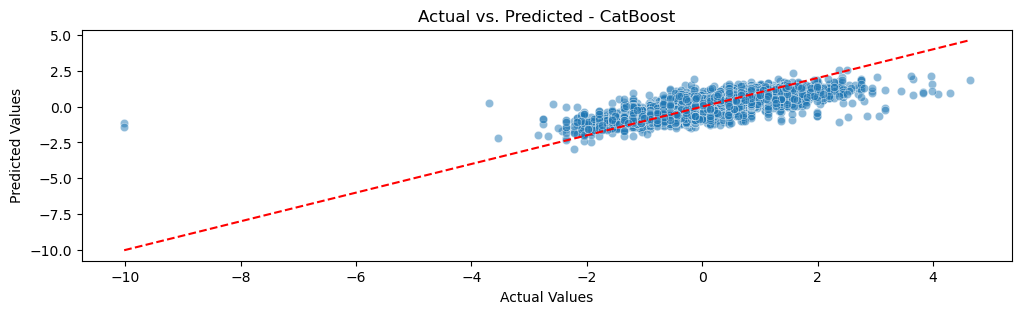

In [20]:
# Scatter Plot: Actual vs. Predicted
plt.figure(figsize = (12,3))

sns.scatterplot(x = y_val,
                y = y_val_pred_CB,
                alpha = 0.5)

plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], '--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted - CatBoost")
plt.show()

In some points, model is performing very well to predict and in some points, it failes.

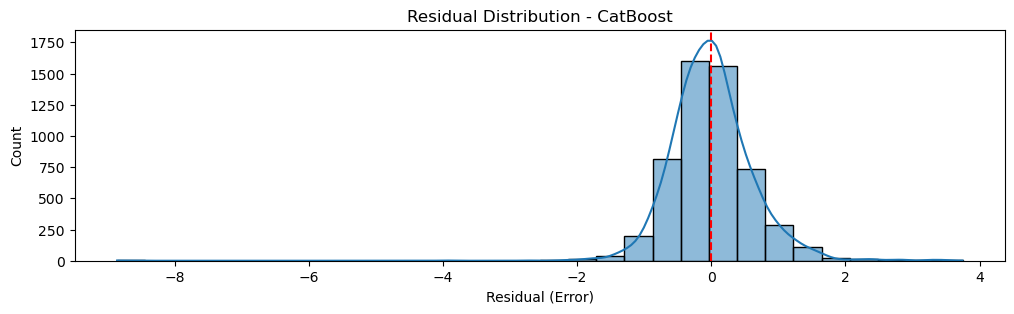

In [21]:
# Residual Plot (Errors)
residuals = y_val - y_val_pred_CB

plt.figure(figsize = (12,3))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='dashed')
plt.xlabel("Residual (Error)")
plt.title("Residual Distribution - CatBoost")
plt.show()

 The fact that residuals are stretched more to the left (with values between -8 and -2) indicates that model is underpredicting the target variable for certain instances. This means that for these cases, the model’s predictions are consistently lower than the actual values.

`Fix Overfitting`: High Variance
* Reduce Model Complexity → like Decrease depth of decision trees, reduce number of estimators in boosting models.
* Use Regularization → like Add L1 (Lasso) or L2 (Ridge) regularization.
* Reduce Features → like Select only the most important features (Feature Selection).
* Add More Data → Overfitting happens when a model learns noise due to too little data.
* Increase Training Data Augmentation → Helps the model generalize better.

`Fix Underfitting`: High Bias
* Increase Model Complexity → like Use deeper trees, more layers in neural networks, or more complex models.
* Feature Engineering → Create new meaningful features (e.g., interactions, transformations).
* Increase Training Time → Train for more iterations (e.g., increase n_estimators in boosting models).
* Reduce Regularization → Too much L1/L2 regularization can cause underfitting.

### **CHECKPOINT**

In [22]:
pickle.dump(best_model, open('../../artifacts/Regressor_Model.pkl', 'wb'))